## Analysis Results

1. **Exchange Rate Changes in 2008:**
   - There were 8 currencies with a positive percentage change and 14 currencies with a negative percentage change when AUD was the base currency.

2. **Top Performer and Worst Performer:**
   - The AUD-GBP currency pair was the top performer indicating stregth in the AUD against this currency during this period.
   - The AUD-JPY currency pair was the worst performer indicating weakness in the AUD against this currency during this period.

3. **Major Currencies in the Worst Performers:**
   - JPY, CHF and USD were the Major currencies in the top 5 worst performers, indicating challenges against 3 major currencies during 2008 period.


In [ ]:
# Dependencies
import requests
import pprint
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

# Access the API key
api_key = os.getenv("API_KEY")

In [27]:
# place the url
url = "https://v6.exchangerate-api.com/v6/"

# Specify the start date
start_date = "2008/1/1"

# Specify the end date
end_date = "2008/12/31"

# Construct the url
response = requests.get(url + api_key + "history/AUD/" + start_date)

# Check the HTTP status code
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code} - {response.text}")


pprint.pprint(response)

{'result': 'success', 'documentation': 'https://www.exchangerate-api.com/docs', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'year': 2008, 'month': 1, 'day': 1, 'base_code': 'AUD', 'conversion_rates': {'AUD': 1, 'BRL': 1.5613, 'CAD': 0.8672, 'CHF': 0.9942, 'CNY': 6.4017, 'DKK': 4.5002, 'EUR': 0.601, 'GBP': 0.4423, 'HKD': 6.8439, 'INR': 34.5862, 'JPY': 98.0367, 'KRW': 821.2581, 'LKR': 95.3512, 'MXN': 9.5807, 'MYR': 2.9011, 'NOK': 4.7662, 'NZD': 1.143, 'SGD': 1.2602, 'SKW': 821.2581, 'THB': 25.8892, 'TWD': 28.4606, 'USD': 0.8776, 'ZAR': 6.0199}}
<Response [200]>


In [28]:
# Construct the 2nd url
response2 = requests.get(url + api_key + "history/AUD/" + end_date)

pprint.pprint(response2)

<Response [200]>


In [30]:
# Get the data into a JSON format
data1 = response.json()
data2 = response2.json()

# Convert the dictionary to a dataframe
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Make the index a column
df1_reset = df1.reset_index()
df2_reset = df2.reset_index()
# Move the 'index' column to a specific position (8 is the column count)
df1_reset.insert(8, 'QuoteCurrency', df1_reset['index'])
df2_reset.insert(8, 'QuoteCurrency', df2_reset['index'])

# Drop the old 'index' column
df1_clean = df1_reset.drop(columns=['index', 'result', 'documentation', 'terms_of_use'])
df2_clean = df2_reset.drop(columns=['index', 'result', 'documentation', 'terms_of_use'])

# Concatenate DataFrames along rows
combined_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

combined_df.head()

,year,month,day,base_code,QuoteCurrency,conversion_rates
0,2008,1,1,AUD,AUD,1.0000
1,2008,1,1,AUD,BRL,1.5613
2,2008,1,1,AUD,CAD,0.8672
3,2008,1,1,AUD,CHF,0.9942
4,2008,1,1,AUD,CNY,6.4017


In [11]:
# Filter the dataset for the start and end of the year
start_of_year = combined_df[(combined_df['month'] == 1) & (combined_df['day'] == 1)]
end_of_year = combined_df[(combined_df['month'] == 12) & (combined_df['day'] == 31)]

# Merge the start and end of the year datasets on the relevant columns
year_end_analysis = pd.merge(start_of_year, end_of_year, on=['year', 'base_code', 'QuoteCurrency'], suffixes=('_start', '_end'))

# Calculate the percentage change in conversion rates
year_end_analysis['percentage_change'] = ((year_end_analysis['conversion_rates_end'] - year_end_analysis['conversion_rates_start']) / year_end_analysis['conversion_rates_start']) * 100

# Display the year-end analysis per currency pair
year_end_analysis.head()

,year,month_start,day_start,base_code,QuoteCurrency,conversion_rates_start,month_end,day_end,conversion_rates_end,percentage_change
0,2008,1,1,AUD,AUD,1.0000,12,31,1.0000,0.000000
1,2008,1,1,AUD,BRL,1.5613,12,31,1.6152,3.452251
2,2008,1,1,AUD,CAD,0.8672,12,31,0.8547,-1.441421
3,2008,1,1,AUD,CHF,0.9942,12,31,0.7453,-25.035204
4,2008,1,1,AUD,CNY,6.4017,12,31,4.7642,-25.579143


In [32]:
# Calculate mean
mean_percentage_change = round(year_end_analysis['percentage_change'].mean(), 2)

# Calculate median
median_percentage_change = round(year_end_analysis['percentage_change'].median(), 2)

# Calculate mode
mode_percentage_change = year_end_analysis['percentage_change'].mode()[0]
mode_percentage_change = round(mode_percentage_change, 2)

# Calculate standard deviation
std_dev_percentage_change = round(year_end_analysis['percentage_change'].std(), 2)

# Calculate variance
variance_percentage_change = round(year_end_analysis['percentage_change'].var(), 2)

# Calculate the first quartile (Q1)
Q1 = year_end_analysis['percentage_change'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = year_end_analysis['percentage_change'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
IQR = round(IQR, 2)

# Calculate min and max values
min_percentage_change = round(year_end_analysis['percentage_change'].min(), 2)
max_percentage_change = round(year_end_analysis['percentage_change'].max(), 2)

# Print the results
print("Mean:", mean_percentage_change)
print("Median:", median_percentage_change)
print("Mode:", mode_percentage_change)
print("Standard Deviation:", std_dev_percentage_change)
print("Variance:", variance_percentage_change)
print("Interquartile Range (IQR):", IQR)
print("Minimum:", min_percentage_change)
print("Maximum:", max_percentage_change)

Mean: -8.81
Median: -6.35
Mode: 7.31
Standard Deviation: 13.26
Variance: 175.8
Interquartile Range (IQR): 22.81
Minimum: -35.33
Maximum: 8.0


In [22]:
# Calculate lower and upper bounds
lower_bound = round((Q1 - (1.5 * IQR)), 2)
upper_bound = round((Q3 + (1.5 * IQR)), 2)

# Identify outliers
outliers = year_end_analysis[(year_end_analysis['percentage_change'] < lower_bound) | (year_end_analysis['percentage_change'] > upper_bound)]

# Check if any outliers were found
if outliers.empty:
    print("No potential outliers found.")
else:
    print(f"Potential Outliers:\n{outliers}")

print(f"lower bound is: {lower_bound}")
print(f"upper bound is: {upper_bound}")

No potential outliers found.
lower bound is: -54.19
upper bound is: 37.04


In [60]:
# Filter all the currency with positive change
positive_percent_change = year_end_analysis[year_end_analysis['percentage_change'] > 0]
# Sort the list in a descending order
positive_currencies = positive_percent_change.groupby('QuoteCurrency')['percentage_change'].max().sort_values(ascending=False)

positive_currencies

QuoteCurrency
GBP    8.003617
ZAR    7.878868
KRW    7.305438
SKW    7.305438
NZD    5.065617
BRL    3.452251
NOK    2.200915
MXN    0.816224
Name: percentage_change, dtype: float64

In [61]:
# Count the total number of currencies in the list
total_positive_change = len(positive_currencies)

total_positive_change

8

In [62]:
# Filter all the currency with negative change
negative_percent_change = year_end_analysis[year_end_analysis['percentage_change'] < 0]
# Sort the list in an ascending order
negative_currencies = negative_percent_change.groupby('QuoteCurrency')['percentage_change'].min().sort_values(ascending=True)

negative_currencies

QuoteCurrency
JPY   -35.331667
CNY   -25.579143
CHF   -25.035204
HKD   -20.925203
USD   -20.430720
SGD   -20.338042
TWD   -19.621160
LKR   -17.318188
DKK   -16.988134
MYR   -16.959084
EUR   -16.522463
THB    -6.350911
INR    -1.916371
CAD    -1.441421
Name: percentage_change, dtype: float64

In [63]:
# Count the total number of currencies in the list
total_negative_change = len(negative_currencies)

total_negative_change

14

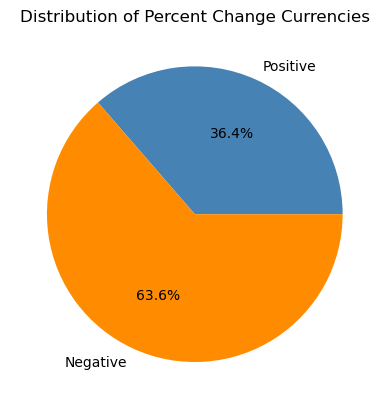

In [66]:
# Data for the pie chart
categories = ['Positive', 'Negative']
counts = [total_positive_change, total_negative_change]

# Colors for the pie chart (steel blue and orange)
colors = ['steelblue', 'darkorange']

# Plotting the pie chart
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors)

# Set plot title
plt.title('Distribution of Percent Change Currencies')

# Display the plot
plt.show()

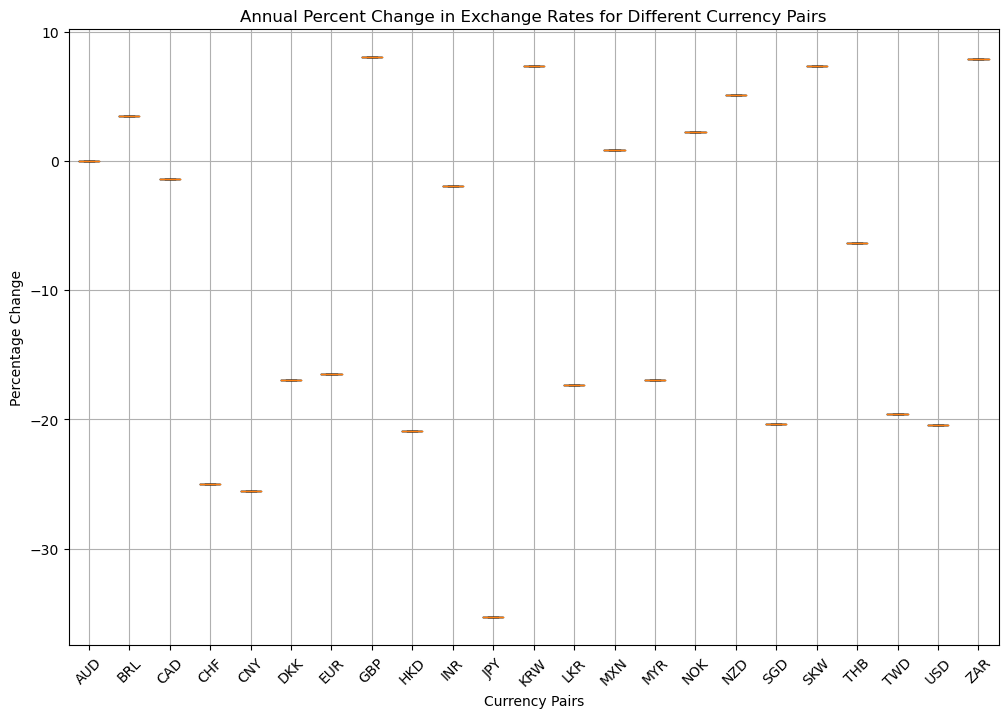

In [33]:
plt.figure(figsize=(12, 8))
plt.boxplot(year_end_analysis['percentage_change'].groupby(year_end_analysis['QuoteCurrency']).apply(list).values, labels=year_end_analysis['QuoteCurrency'].unique())
plt.title('Annual Percent Change in Exchange Rates for Different Currency Pairs')
plt.xlabel('Currency Pairs')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

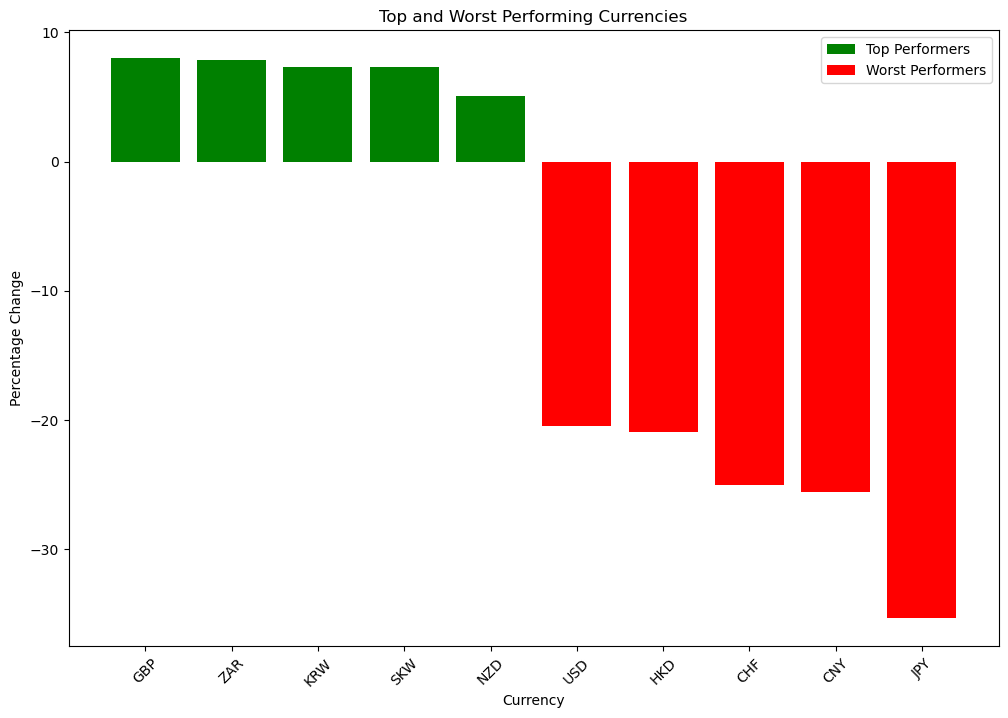

In [70]:
# Select top 5 performing currencies
top_performers = year_end_analysis.nlargest(5, 'percentage_change')  
# Select bottom 5 performing currencies
worst_performers = year_end_analysis.nsmallest(5, 'percentage_change')
# Sort the worst performers in descending order
worst_performers_sorted = worst_performers.sort_values('percentage_change', ascending=False)

plt.figure(figsize=(12, 8))

# Bar chart for top performers
plt.bar(top_performers['QuoteCurrency'], top_performers['percentage_change'], color='green', label='Top Performers')

# Bar chart for worst performers
plt.bar(worst_performers_sorted['QuoteCurrency'], worst_performers_sorted['percentage_change'], color='red', label='Worst Performers')

plt.title('Top and Worst Performing Currencies')
plt.xlabel('Currency')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.show()